In [1]:
import scipy as sp 
from scipy import io
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [152]:
data = io.loadmat("amp_data.mat")


In [153]:
data= data['amp_data']

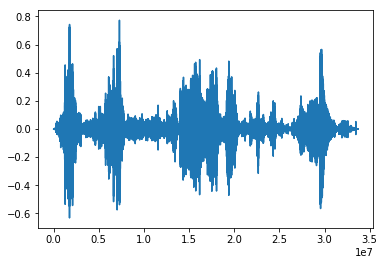

In [113]:
plt.plot(data)

In [112]:
data.shape

(33713280, 1)

[]

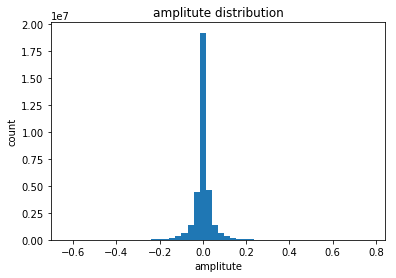

In [114]:
plt.hist(data,bins=50)
plt.ylabel("count")
plt.title("amplitute distribution")
plt.xlabel("amplitute")
plt.plot()
plt.plot()

[]

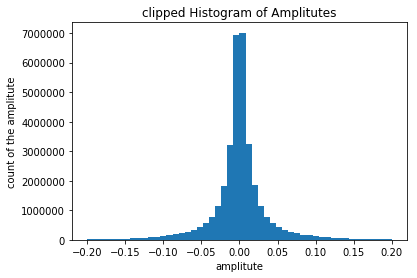

In [115]:
#data_clipped=np.sort(data)[int(data.shape[0]*0.25):int(data.shape[0]*0.75)]
data_copy=np.array(data)
data_clipped=data_copy[data_copy>-0.2]

data_clipped=data_clipped[data_clipped<0.2]
plt.figure()
#plt.figure(figsize=(10,8))
plt.hist(data_clipped,bins=50)
plt.ylabel("count of the amplitute")
plt.title("clipped Histogram of Amplitutes")
plt.xlabel("amplitute")
plt.plot()

In [116]:
pd_data= pd.DataFrame(data)

In [117]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713280 entries, 0 to 33713279
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 257.2 MB


In [118]:
pd_data.describe()

,0
count,3.371328e+07
mean,-1.586184e-05
std,4.153176e-02
min,-6.327820e-01
25%,-1.095581e-02
50%,0.000000e+00
75%,1.107788e-02
max,7.725220e-01


In [151]:
# assumping the input has been read from the mat and the data column has been extracted from the dictionary
def preprocess(data):
    max_index= data.shape[0]//21*21     #reshape the data so that it can be divivded by 21
    clipped_data=np.copy(data[ : max_index])
    clipped_data=clipped_data.reshape(-1,21)
    print(clipped_data.shape)
    #random shuffle and splitting into training validation and testing dataset
    np.random.seed(10) 
    np.random.shuffle(clipped_data)
    train,testandval=train_test_split(clipped_data,test_size=0.3,train_size=0.7,random_state=10,shuffle=False)
    val,test= train_test_split(testandval,test_size=0.5,train_size=0.5,random_state=10,shuffle=False)
    X_shuf_train=train[:,:20]

    y_shuf_train=train[:,-1]

    X_shuf_val=val[:,:20]

    y_shuf_val=val[:,-1]

    X_shuf_test=test[:,:20]

    y_shuf_test=test[:,-1]
    return X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test

In [155]:
X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test= preprocess(data)

(1605394, 21)


In [143]:
data.shape

(33713280, 1)

In [13]:
X_shuf_train.shape

(1123775, 20)

In [ ]:
#extended_biased_X = np.concatenate([extended_x, np.ones((x_train.shape[0],1))], axis=1)
#extended_biased_y=np.concatenate([extended_y, np.ones((extended_y.shape[0],1))], axis=1)
#extended_biased_x_trainandtest = np.concatenate([extended_x_trainandtest, np.ones((extended_x_trainandtest.shape[0],1))], axis=1)

In [173]:
#use the first training sample as target value
y_train= X_shuf_train[0]    
x_train=np.arange(0,1,0.05) 
x_train=x_train[:,None]
y_train=y_train[:,None]
y_test=y_shuf_train[0]

#linear fit with bias by adding one column to x_train
X_bias = np.concatenate([x_train, np.ones((x_train.shape[0],1))], axis=1)
w1,b1=np.linalg.lstsq(X_bias,y_train)[0]
y_pred1=w1+b1

#quadratic fit by expanding feature sapce of the samples
extended_x=np.array([[1,x,x**2,x**3,x**4] for x in x_train])
w=np.linalg.lstsq(extended_x,y_train)[0]
#predicting the test sample position
extend_basis= lambda t: [1,t,t**2,t**3,t**4]
extended_y=np.array(extend_basis(1))[None,:]
y_pred_2 = np.dot(extended_y,w)[0,0]

x_trainandtest=np.append(x_train,[1])
extended_x_trainandtest=np.array([[1,x,x**2,x**3,x**4] for x in x_trainandtest])

plt.figure()
train_sample,=plt.plot(x_train,y_train,'bo')
linear_fit,=plt.plot(x_trainandtest,w1*x_trainandtest+b1)
test_sample,=plt.plot(1,y_test,'b*',markersize=10)
linear_pred,=plt.plot(1,y_pred1,'go')
qua_pred,=plt.plot(1,y_pred_2,'ro',alpha=0.5)
qua_fit,=plt.plot(x_trainandtest,np.matmul(extended_x_trainandtest,w))
plt.legend([train_sample,linear_fit,test_sample,qua_fit,linear_pred,qua_pred],['training samples','linear fitting','testing sample','quadratic fitting','linear prediction','quadratic prediction'],loc='best')
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("linear and quadratic fit to selected sample")

/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5,1,'linear and quadratic fit to selected sample')

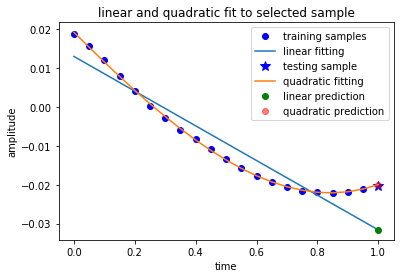

In [177]:
def make_vv(C,K):
    phi = Phi(C,K)
    phi_tanspose = phi
    phi_tanspose = phi_tanspose.transpose()
    temp = phi_tanspose.dot(phi)
    temp = np.linalg.inv(temp)
    temp = temp.transpose()
    temp = phi.dot(temp)
    phi_t1 =np.ones(K)
    temp = temp.dot(phi_t1)
    temp = temp.transpose()
    return temp


In [178]:
def poly_predict(K,y_trian):
    v_tanspose = make_vv(y_train.size,K)
    v_tanspose = v_tanspose.transpose()
    v_tanspose = v_tanspose.dot(y_trian)
    return v_tanspose.item(0,0)

In [179]:
def poly_predict_batch(C,K,y_train):
    v_tanspose = make_vv(C,K)
    v_tanspose = v_tanspose.transpose()
    train_data = y_train[:,-C:]
    train_data = train_data.transpose()
    result = v_tanspose.dot(train_data)
    return result.transpose().A1

In [181]:
C = 20
K = 5
bestC = 0
bestK = 0;
bestMean = 10000;
bestTotal = 0;
for c in range(1,21):
    for k in range(1,21):
        predicts = poly_predict_batch(c,k,X_shuf_train)
        total_error = np.sum(np.square(y_shuf_train - predicts))
        mean_error = np.mean(np.square(y_shuf_train - predicts))
        print("C is: " + str(c))
        print("K is: " + str(k))
        print("Mean Error: " + str(mean_error))
        print("Total Error: " + str(total_error))
        if(bestMean >= mean_error):
            bestMean =mean_error
            bestTotal = total_error
            bestC= c
            bestK=k
            
print(bestMean)
print(bestTotal)
print(bestC,bestK)

C is: 1
K is: 1
Mean Error: 3.690249672020448e-05
Total Error: 41.47010325174779
C is: 1
K is: 2
Mean Error: 0.0018023259836548624
Total Error: 2025.408882281743
C is: 1
K is: 3
Mean Error: 1.6608238192146478
Total Error: 1866392.287437941
C is: 1
K is: 4
Mean Error: 0.38917669094140694
Total Error: 437347.0358626796
C is: 1
K is: 5
Mean Error: 0.015463971243954338
Total Error: 17378.024284674786
C is: 1
K is: 6
Mean Error: 0.049722598758648984
Total Error: 55877.01342000076
C is: 1
K is: 7
Mean Error: 1.078415522425418
Total Error: 1211896.403713624
C is: 1
K is: 8
Mean Error: 10.638882755652672
Total Error: 11955710.46873358
C is: 1
K is: 9
Mean Error: 0.7624276680036818
Total Error: 856797.1526108375
C is: 1
K is: 10
Mean Error: 0.0018023259836548624
Total Error: 2025.408882281743
C is: 1
K is: 11
Mean Error: 0.44151914875462944
Total Error: 496168.1813917337
C is: 1
K is: 12
Mean Error: 2.904608957226249
Total Error: 3264126.930906928
C is: 1
K is: 13
Mean Error: 0.0017253688777918

C is: 6
K is: 3
Mean Error: 4.2075292837570124e-05
Total Error: 47.28316220854037
C is: 6
K is: 4
Mean Error: 4.596955812351438e-05
Total Error: 51.65944018025237
C is: 6
K is: 5
Mean Error: 0.0001043642889643212
Total Error: 117.28197883088005
C is: 6
K is: 6
Mean Error: 0.0003789172172133736
Total Error: 425.8176957739589
C is: 6
K is: 7
Mean Error: 0.001154909382412506
Total Error: 1297.8582912206139
C is: 6
K is: 8
Mean Error: 0.0009775545253487969
Total Error: 1098.551336723844
C is: 6
K is: 9
Mean Error: 0.0011747913833579837
Total Error: 1320.201186833118
C is: 6
K is: 10
Mean Error: 0.0014566634964939915
Total Error: 1636.9620207725352
C is: 6
K is: 11
Mean Error: 0.014357974218476873
Total Error: 16135.132477368848
C is: 6
K is: 12
Mean Error: 0.0042860199567023236
Total Error: 4816.522076843154
C is: 6
K is: 13
Mean Error: 0.3274304856889574
Total Error: 367958.19405510806
C is: 6
K is: 14
Mean Error: 0.16278919377140855
Total Error: 182938.42623046465
C is: 6
K is: 15
Mean E

C is: 11
K is: 5
Mean Error: 9.243252998145419e-05
Total Error: 103.87336637990867
C is: 11
K is: 6
Mean Error: 0.00014748032444465624
Total Error: 165.73470160279356
C is: 11
K is: 7
Mean Error: 0.0003081810950755553
Total Error: 346.3262101185322
C is: 11
K is: 8
Mean Error: 0.00079353761122312
Total Error: 891.7577290522618
C is: 11
K is: 9
Mean Error: 0.014633091624360267
Total Error: 16444.30254016546
C is: 11
K is: 10
Mean Error: 0.013620093273075867
Total Error: 15305.920317950833
C is: 11
K is: 11
Mean Error: 0.03475149965385225
Total Error: 39052.86652350781
C is: 11
K is: 12
Mean Error: 0.011245092124450384
Total Error: 12636.95340215423
C is: 11
K is: 13
Mean Error: 0.02346429889193047
Total Error: 26368.592487279162
C is: 11
K is: 14
Mean Error: 0.5284264464341399
Total Error: 593832.4298415256
C is: 11
K is: 15
Mean Error: 0.06201115125610507
Total Error: 69686.58150282947
C is: 11
K is: 16
Mean Error: 0.38595948436523037
Total Error: 433731.61954253673
C is: 11
K is: 17
M

C is: 16
K is: 5
Mean Error: 0.00014061534398265334
Total Error: 158.02000818410625
C is: 16
K is: 6
Mean Error: 0.00014638051349888983
Total Error: 164.49876155721492
C is: 16
K is: 7
Mean Error: 0.00020745930678482528
Total Error: 233.13758248211704
C is: 16
K is: 8
Mean Error: 0.00038758898263527563
Total Error: 435.5628089609569
C is: 16
K is: 9
Mean Error: 0.000859281408616881
Total Error: 965.6389649684355
C is: 16
K is: 10
Mean Error: 0.0020887077853467923
Total Error: 2347.2375914780914
C is: 16
K is: 11
Mean Error: 0.006943404637624357
Total Error: 7802.824546646312
C is: 16
K is: 12
Mean Error: 0.015323323750283979
Total Error: 17219.968147475378
C is: 16
K is: 13
Mean Error: 0.01665874619390154
Total Error: 18720.682504051703
C is: 16
K is: 14
Mean Error: 0.018768247069832943
Total Error: 21091.286850901517
C is: 16
K is: 15
Mean Error: 0.025141249533534096
Total Error: 28253.107694547278
C is: 16
K is: 16
Mean Error: 0.08773738693607806
Total Error: 98597.08200409112
C is: 

In [180]:
c = bestC
k = bestK
predicts = poly_predict_batch(c,k,X_shuf_val)
total_error = np.sum(np.square(y_shuf_val - predicts))
mean_error = np.mean(np.square(y_shuf_val - predicts))
print("On Dev:")
print("C is: " + str(c))
print("K is: " + str(k))
print("Mean Error: " + str(mean_error))
print("Total Error: " + str(total_error))


predicts = poly_predict_batch(c,k,X_shuf_test)
total_error = np.sum(np.square(y_shuf_test - predicts))
mean_error = np.mean(np.square(y_shuf_test - predicts))
print("On Test:")
print("C is: " + str(c))
print("K is: " + str(k))
print("Mean Error: " + str(mean_error))
print("Total Error: " + str(total_error))

NameError: name 'bestC' is not defined

In [ ]:
Mean Error: 0.6836516627113578
Total Error: 768270.6472634561
1.3423977471406233e-05
15.08553028292954
2 4

In [ ]:
On Dev:
C is: 2
K is: 4
Mean Error: 1.369980874153201e-05
Total Error: 3.2990372432395816
On Test:
C is: 2
K is: 4
Mean Error: 1.3843913337935206e-05
Total Error: 3.333752770908177

In [45]:
X_shuf_train.shape[0]

1123775

In [51]:
#q4a assumes X_shuf_train exists
best_loss=1000
best_c=0
def fit_data(C):
    x_train=X_shuf_train[:,-C:]
    y_train=y_shuf_train
    
    #,X_shuf_test,y_shuf_test
    biased_x_train = np.concatenate([x_train, np.ones((x_train.shape[0],1))], axis=1)
    linear_fit=np.linalg.lstsq(biased_x_train,y_train)
    w=linear_fit[0]
    loss= linear_fit[1]
    return w,loss
for C in range(1,21):
    print("using {} previous timestamps".format(C))
    w,train_loss= fit_data(C)
    x_val,y_val=X_shuf_val[:,-C:],y_shuf_val
    biased_x_val = np.concatenate([x_val, np.ones((x_val.shape[0],1))], axis=1)
    val_loss=np.square(y_val-np.matmul(biased_x_val,w)).mean()
    if val_loss<best_loss :
        best_c=c
        best_loss=val_loss
        best_w =w
    print("training loss is {}".format(train_loss/X_shuf_train.shape[0]))
    print("val loss is {}\n".format(val_loss))

using 1 previous timestamps
training loss is [3.66881519e-05]
val loss is 3.684507457070041e-05

using 2 previous timestamps
training loss is [1.1526311e-05]
val loss is 1.18444341368729e-05

using 3 previous timestamps


/afs/inf.ed.ac.uk/user/s16/s1603859/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


training loss is [9.82618613e-06]
val loss is 1.003460068311717e-05

using 4 previous timestamps
training loss is [9.49970894e-06]
val loss is 9.618642907248963e-06

using 5 previous timestamps
training loss is [9.04746758e-06]
val loss is 9.147240050193521e-06

using 6 previous timestamps
training loss is [8.85702699e-06]
val loss is 8.937329278386288e-06

using 7 previous timestamps
training loss is [8.36342937e-06]
val loss is 8.423199373885928e-06

using 8 previous timestamps
training loss is [8.12500597e-06]
val loss is 8.288207725523193e-06

using 9 previous timestamps
training loss is [8.05619341e-06]
val loss is 8.235476317253492e-06

using 10 previous timestamps
training loss is [7.96105937e-06]
val loss is 8.119770417654983e-06

using 11 previous timestamps
training loss is [7.89967666e-06]
val loss is 8.086567940384451e-06

using 12 previous timestamps
training loss is [7.84166298e-06]
val loss is 8.072183673213144e-06

using 13 previous timestamps
training loss is [7.788106

In [ ]:
best_c

In [53]:
#q4b
best_C=18
x_test_q4,y_test=X_shuf_test[:,-best_C:],y_shuf_test
biased_x_test = np.concatenate([x_test_q4, np.ones((x_test_q4.shape[0],1))], axis=1)
test_loss=np.square(y_test-np.matmul(biased_x_test,best_w)).mean()
test_loss

7.489541691960743e-06

In [78]:
#q4c
x_val_q4,y_val_q4=X_shuf_val[:,-best_C:],y_shuf_val
biased_x_val_q4 = np.concatenate([x_val_q4, np.ones((x_val_q4.shape[0],1))], axis=1)
val_residual=y_val_q4-np.matmul(biased_x_val_q4,best_w) #N*1




[]

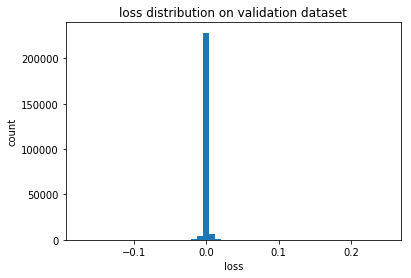

In [82]:


plt.figure()
plt.hist(val_residual,bins=50)
plt.ylabel("count")
plt.title("loss distribution on validation dataset")
plt.xlabel("loss")
plt.plot()

[]

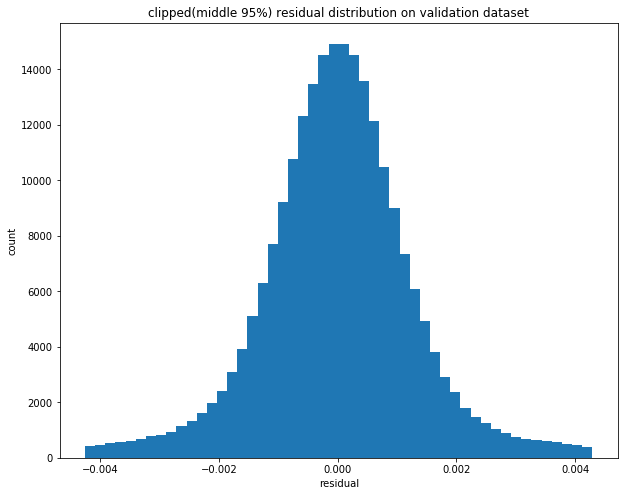

In [90]:
val_residual_clipped=np.sort(val_residual)[int(val_loss.shape[0]*0.025):int(val_loss.shape[0]*0.975)]
plt.figure(figsize=(10,8))
plt.hist(val_residual_clipped,bins=50)
plt.ylabel("count")
plt.title("clipped(middle 95%) residual distribution on validation dataset")
plt.xlabel("residual")
plt.plot()